<a href="https://colab.research.google.com/github/Malekkamoua/Medical-data-classifier/blob/main/5_Doc2vec_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous avons choisi de travailler avec Doc2vec puisqu'il a donné des resultats meilleurs que word2vec.
NB: Ce code traite 20000/100.000 fichiers de données non supervisées.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install nltk==3.4.5

     |████████████████████████████████| 1.5MB 8.6MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449924 sha256=fdaa9c18e54e9c8e391b5e064415ceae5d316b70a7e52661ea5f1db792b0ab93
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import string
import nltk  
from nltk.tokenize import word_tokenize 

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/gdrive/MyDrive/PFA DATA/labelled_data_80.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/PFA DATA/Copy of unlabelled_data_80.csv')

arr1 = np.array(df1['SUMMARY'].values)
arr2 = np.array(df2['SUMMARY'].values)

doc = np.concatenate((arr1, arr2))

print(len(doc))

15593


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

# Preparing the dataset
sentences = [nltk.word_tokenize(sentence) for sentence in doc]

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]

In [ ]:
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=5,
               )
  
model.build_vocab(documents)

model.save("d2v.model")
print("Model Saved")

In [ ]:
max_epochs = 10
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=5,
                dm =1)
  
model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(documents,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [ ]:
print(len(model.docvecs))
print(len(model.wv.vocab))


15593
7538


In [ ]:
model.wv.most_similar("war")

[('special', 0.8246015310287476),
 ('whites', 0.7712202668190002),
 ('measure', 0.7701413035392761),
 ('somehow', 0.753329873085022),
 ('symbolic', 0.7478264570236206),
 ('hamlet', 0.746517539024353),
 ('essay', 0.7414482831954956),
 ('barn', 0.7349464893341064),
 ('character', 0.7320395708084106),
 ('added', 0.726561427116394)]

In [ ]:
#Imports the libraries and read the data files
import random
import re
from nltk.stem.snowball import SnowballStemmer
import os
import gensim
from gensim.models import Doc2Vec
from nltk.corpus import stopwords
import nltk
import matplotlib
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm 

In [ ]:
d2v_model = model

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


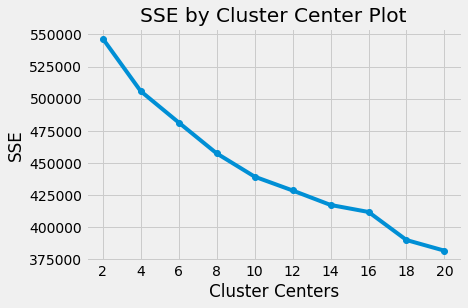

In [ ]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(d2v_model.docvecs.vectors_docs, 20)

In [ ]:
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=50, start_alpha=0.002, end_alpha=-0.016)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = range(2, 50)
silhouette_avg_n_clusters = []
X = d2v_model.docvecs.vectors_docs
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [ ]:
#Clusters = 7 is the optimal number.
K_value = 7
kmeans_model = KMeans(n_clusters = K_value, init='k-means++', n_init = 2000, max_iter = 6000, precompute_distances = 'auto')  
X = kmeans_model.fit(d2v_model.docvecs.vectors_docs )
labels=kmeans_model.labels_.tolist()
clusters = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs )


In [ ]:
import plotly.express as px

label1 = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7","#8ecae6","#219ebc","#023047","#ffb703","#fb8500","#5f0f40","#ecc8af","#e7ad99","#ce796b","#c18c5d","#495867","#9a031e","#fb8b24","#e36414","#0f4c5c","#fb8500","#5f0440","#ecc8ac","#e7ad49","#ce795b","#ca8c5d","#495467","#9a731e","#fb8u24","#e36424","#0f4f5c"]
print(len(label1))
color = [label1[i] for i in labels]

fig = px.scatter_3d(clusters,
              color=color,
    opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
# #PCA
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs)
pca = PCA(n_components=3).fit(d2v_model.docvecs.vectors_docs)
datapoint = pca.transform(d2v_model.docvecs.vectors_docs)

31


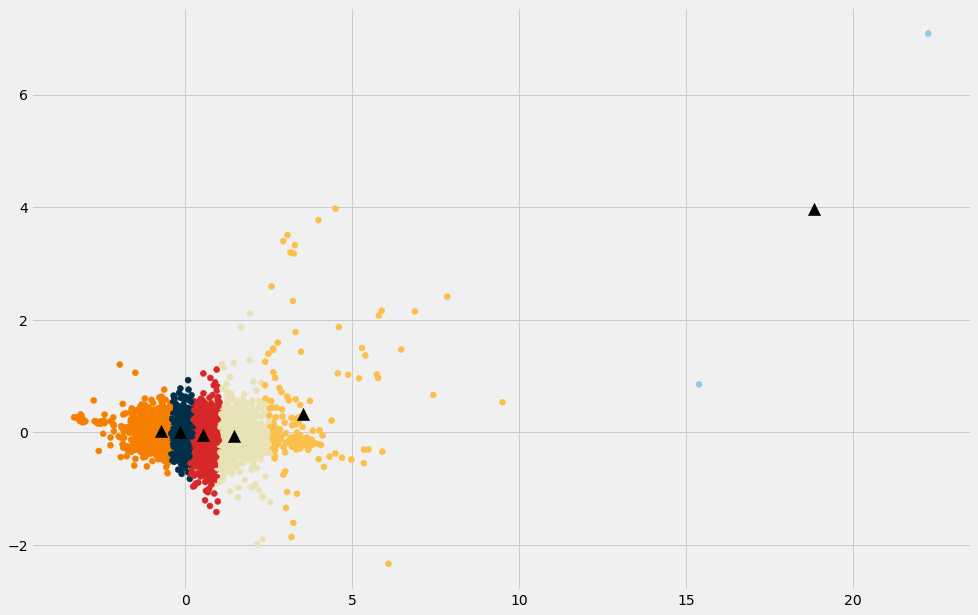

In [ ]:
#GRAPH
#"""**Plot the clustering result**"""

plt.figure(figsize=(15,10))
label1 = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7","#8ecae6","#219ebc","#023047","#ffb703","#fb8500","#5f0f40","#ecc8af","#e7ad99","#ce796b","#c18c5d","#495867","#9a031e","#fb8b24","#e36414","#0f4c5c","#fb8500","#5f0440","#ecc8ac","#e7ad49","#ce795b","#ca8c5d","#495467","#9a731e","#fb8u24","#e36424","#0f4f5c"]
print(len(label1))
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

31


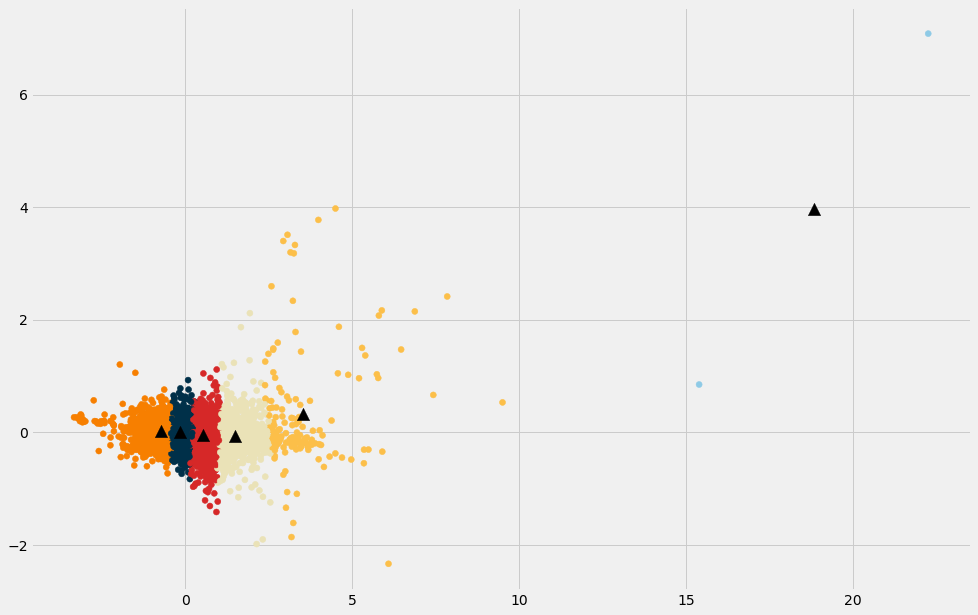

In [ ]:
#GRAPH
#"""**Plot the clustering result**"""

# #PCA
l = kmeans_model.fit_predict(d2v_model.docvecs.vectors_docs)
pca = PCA(n_components=4).fit(d2v_model.docvecs.vectors_docs)
datapoint = pca.transform(d2v_model.docvecs.vectors_docs)

plt.figure(figsize=(15,10))
label1 = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7","#8ecae6","#219ebc","#023047","#ffb703","#fb8500","#5f0f40","#ecc8af","#e7ad99","#ce796b","#c18c5d","#495867","#9a031e","#fb8b24","#e36414","#0f4c5c","#fb8500","#5f0440","#ecc8ac","#e7ad49","#ce795b","#ca8c5d","#495467","#9a731e","#fb8u24","#e36424","#0f4f5c"]
print(len(label1))
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

Clustering results: <br>
Number of clusters = 7 <br>
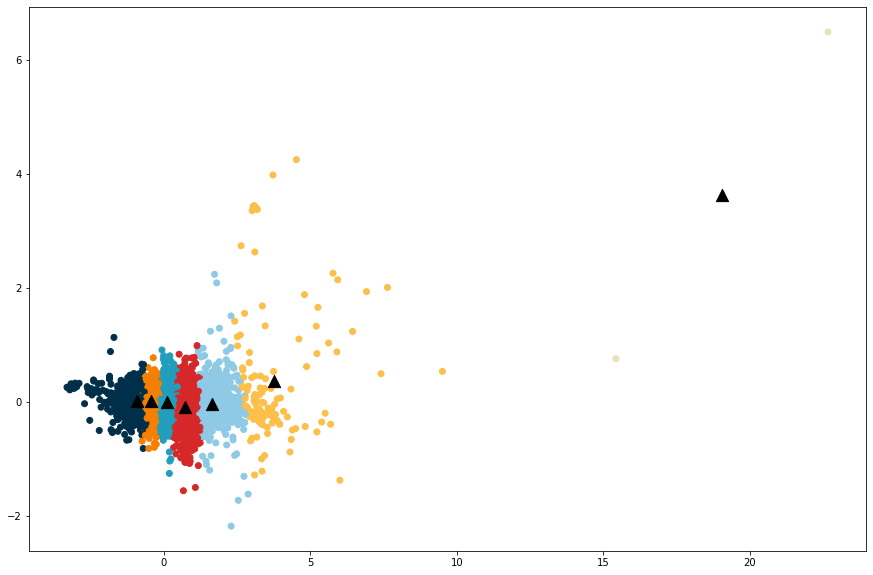 <br>
Number of clusters = 8 <br>
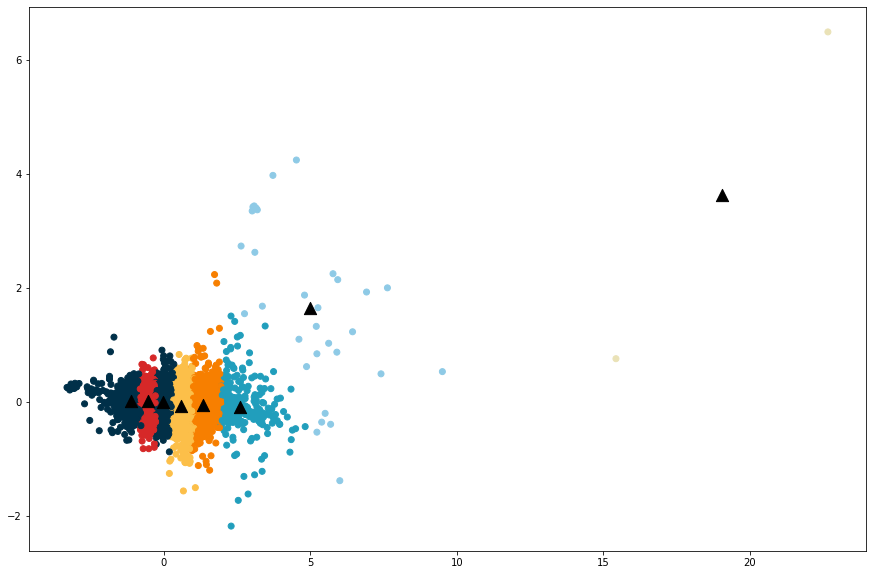
<br>
Number of clusters = 9 <br>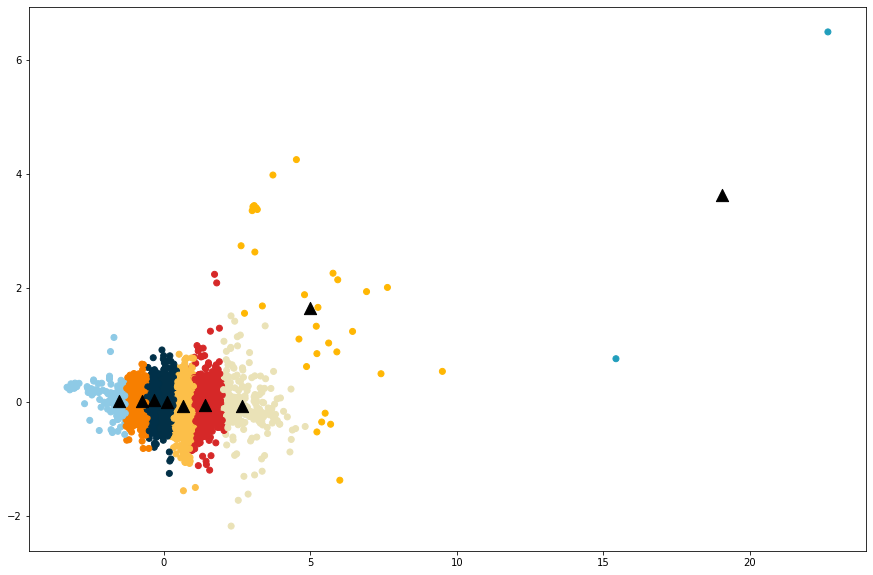 <br> Number of clusters = 10 <br>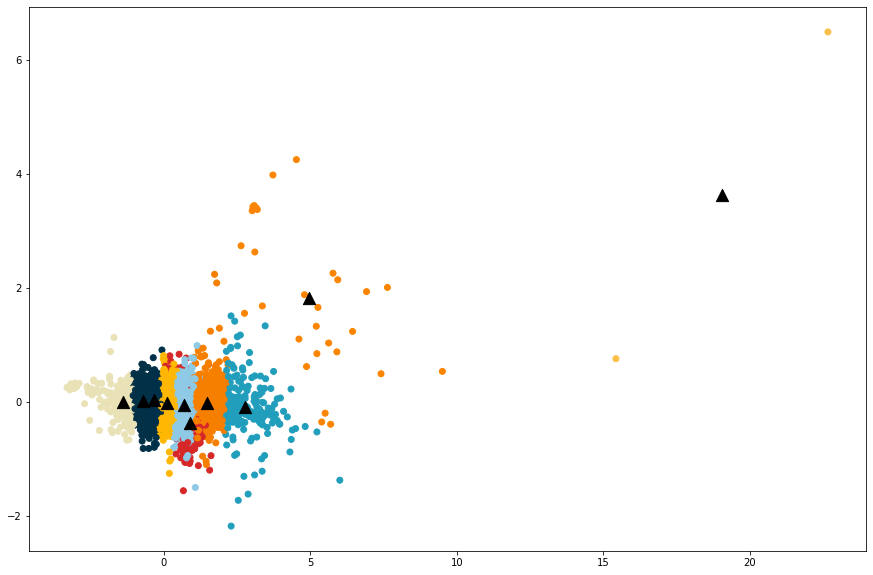<br> Number of clusters = 11 <br>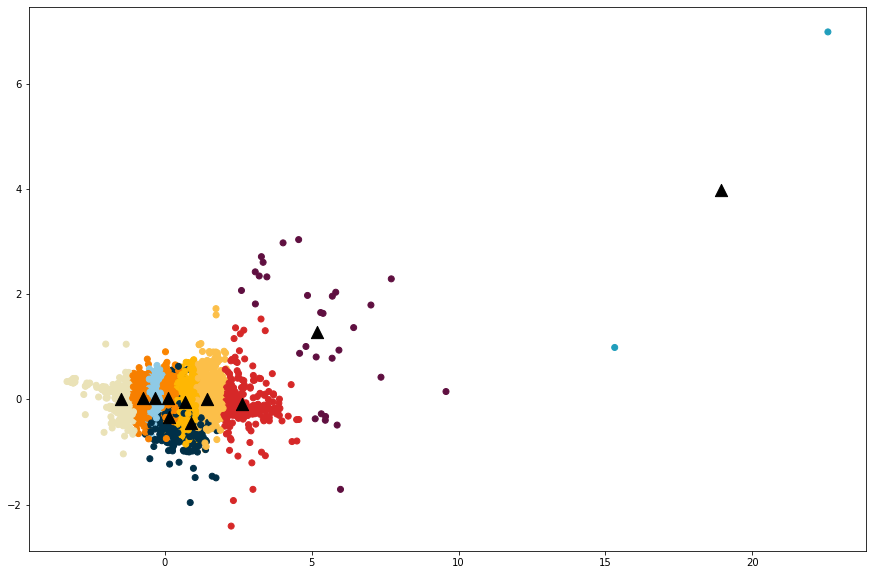 <br> Number of clusters = 12 <br>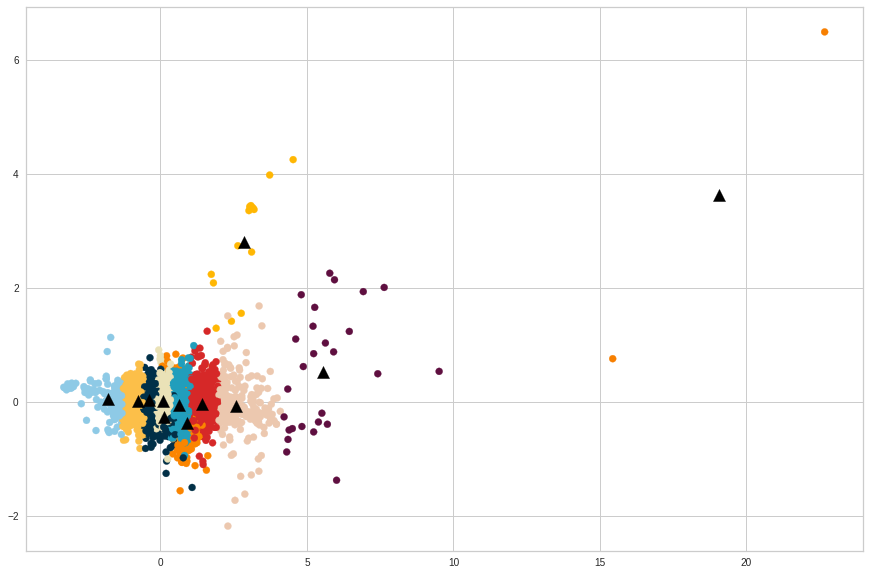